In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Load the dataset
df = pd.read_excel('Diabetes prediction dataset.xlsx')

In [4]:
# Check for missing values just incase 
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [5]:
# Data Preprocessing
df['gender_encoded'] = LabelEncoder().fit_transform(df['gender'])
df['smoking_encoded'] = LabelEncoder().fit_transform(df['smoking_history'])

# Drop original categorical columns
df.drop(['gender', 'smoking_history'], axis=1, inplace=True)

In [6]:
X = df.drop('diabetes', axis=1) #features
y = df['diabetes'] #target

In [7]:
# Scale the features
X_scaled = StandardScaler().fit_transform(X)


In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.25)


In [9]:
# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [10]:
# Model Prediction
y_pred_gb = gb_model.predict(X_test)

In [11]:
# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb}')

Gradient Boosting Accuracy: 0.97132


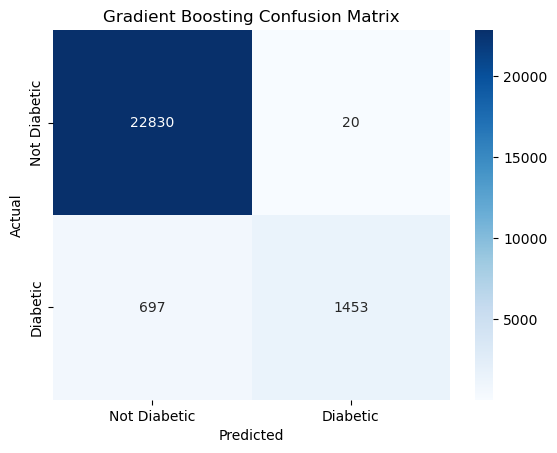

In [12]:
# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

In [15]:
# Save the trained model for deployment
import joblib
joblib.dump(gb_model, 'diabetes_prediction_gb_model1.pkl')

['diabetes_prediction_gb_model1.pkl']

In [16]:
# Load the model for prediction to see if our model works
loaded_model = joblib.load('diabetes_prediction_gb_model1.pkl')
sample_prediction = loaded_model.predict(X_test[:1])
print(f'Sample prediction: {sample_prediction}')

Sample prediction: [0]
